In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as nb
from pathlib import Path
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# Import files

wildfires = Path("Area_burned_by_cause_class.csv")
try:
    wildfires_df = pd.read_csv(wildfires, encoding='utf-8')
except UnicodeDecodeError:
    # Try reading with a different encoding if 'utf-8' fails
    wildfires_df = pd.read_csv(wildfires, encoding='ISO-8859-1')
wildfires_df

,Year,Année,ISO,Jurisdiction,Juridiction,Cause,Origine,Area (hectares),Data Qualifier,Superficie (en hectare),Qualificatifs de données
0,1990,1990,AB,Alberta,Alberta,Human activity,Activités humaines,2393.8,a,2393.8,a
1,1990,1990,AB,Alberta,Alberta,Lightning,Foudre,55482.6,a,55482.6,a
2,1990,1990,AB,Alberta,Alberta,Unspecified,Indéterminée,1008.8,a,1008.8,a
3,1990,1990,BC,British Columbia,Colombie-Britannique,Human activity,Activités humaines,40278.3,a,40278.3,a
4,1990,1990,BC,British Columbia,Colombie-Britannique,Lightning,Foudre,35503.5,a,35503.5,a
...,...,...,...,...,...,...,...,...,...,...,...
1054,2021,2021,PC,Parks Canada,Parcs Canada,Unspecified,Indéterminée,42538.0,e,42538.0,e
1055,2021,2021,PE,Prince Edward Island,Île-du-Prince-Édouard,Unspecified,Indéterminée,0.1,e,0.1,e
1056,2021,2021,QC,Quebec,Québec,Unspecified,Indéterminée,49748.0,e,49748.0,e
1057,2021,2021,SK,Saskatchewan,Saskatchewan,Unspecified,Indéterminée,956084.0,e,956084.0,e


In [3]:
deforestation = Path("treecover_loss__ha.csv")
deforestation_df = pd.read_csv(deforestation)
def_df = deforestation_df.rename(columns = {'tsc_tree_cover_loss_drivers__driver':'Driver',
                                  'umd_tree_cover_loss__year': 'Year',
                                  'umd_tree_cover_loss__ha': 'Area (ha)',
                                  'gfw_gross_emissions_co2e_all_gases__Mg': 'Co2 Emissions (mg)'})
clean_def_df = def_df.loc[(def_df["Year"] < 2021)]
clean_def_df

,Driver,Year,Area (ha),Co2 Emissions (mg)
0,Unknown,2012,2.024898e+04,6.180339e+06
2,Shifting agriculture,2019,3.902074e+02,1.180400e+05
3,Forestry,2020,8.241403e+05,2.818487e+08
4,Unknown,2019,9.083234e+03,2.341594e+06
5,Forestry,2005,1.265036e+06,3.409206e+08
...,...,...,...,...
127,Unknown,2004,1.529486e+04,4.158354e+06
128,Shifting agriculture,2017,4.191385e+02,1.167649e+05
129,Wildfire,2008,1.108305e+06,4.664998e+08
130,Wildfire,2018,9.524899e+05,4.214107e+08


In [10]:
clean_def_df.to_csv('clean_deforestation.csv')

In [5]:
clean_def_year = clean_def_df.groupby('Year')
new_clean_def_year= clean_def_year['Area (ha)'].sum()

clean_def_year_df = pd.DataFrame(new_clean_def_year)
clean_def_year_df

,Area (ha)
Year,
2001,1.358155e+06
2002,2.316888e+06
2003,1.607283e+06
2004,2.706459e+06
2005,2.920793e+06
2006,2.406191e+06
2007,2.117900e+06
2008,1.949008e+06
2009,1.550372e+06


In [6]:
# Clean the wildfires data for only English columns
wildfires_df.drop(wildfires_df.columns[[1, 4, 6, 9, 10]], axis=1, inplace=True)
wildfires_df

,Year,ISO,Jurisdiction,Cause,Area (hectares),Data Qualifier
0,1990,AB,Alberta,Human activity,2393.8,a
1,1990,AB,Alberta,Lightning,55482.6,a
2,1990,AB,Alberta,Unspecified,1008.8,a
3,1990,BC,British Columbia,Human activity,40278.3,a
4,1990,BC,British Columbia,Lightning,35503.5,a
...,...,...,...,...,...,...
1054,2021,PC,Parks Canada,Unspecified,42538.0,e
1055,2021,PE,Prince Edward Island,Unspecified,0.1,e
1056,2021,QC,Quebec,Unspecified,49748.0,e
1057,2021,SK,Saskatchewan,Unspecified,956084.0,e


In [7]:
# Clean the wildfires data so the period is from 2001 - 2020
clean_wildfires_df = wildfires_df.loc[(wildfires_df["Year"] > 2000) & 
                (wildfires_df["Year"] < 2021)]
clean_wildfires_df

,Year,ISO,Jurisdiction,Cause,Area (hectares),Data Qualifier
339,2001,AB,Alberta,Human activity,139800.316,a
340,2001,AB,Alberta,Lightning,27108.301,a
341,2001,AB,Alberta,Unspecified,78.492,a
342,2001,BC,British Columbia,Human activity,5191.519,a
343,2001,BC,British Columbia,Lightning,8981.690,a
...,...,...,...,...,...,...
1041,2020,SK,Saskatchewan,Human activity,41398.410,a
1042,2020,SK,Saskatchewan,Lightning,779.901,a
1043,2020,SK,Saskatchewan,Unspecified,773.800,a
1044,2020,YT,Yukon,Human activity,11.700,a


In [16]:
clean_wildfires_year = clean_wildfires_df.groupby('Year')
new_clean_wildfires_year = clean_wildfires_year['Area (hectares)'].sum()
clean_wildfires_df = pd.DataFrame(new_clean_wildfires_year)
clean_wildfires_df

,Area (hectares)
Year,
2001,6.476695e+05
2002,2.763605e+06
2003,2.168405e+06
2004,3.182999e+06
2005,1.686770e+06
2006,2.100680e+06
2007,1.785468e+06
2008,1.664925e+06
2009,7.625668e+05


In [36]:
merged_df = pd.merge(clean_wildfires_df,clean_def_year_df, how="inner", on=["Year"])
new_merged_df = merged_df.rename(columns={'Area (hectares)' : 'Area Wildfires (ha)',
                         'Area (ha)' :'Area Deforestation (ha)'})

new_merged_df

,Area Wildfires (ha),Area Deforestation (ha)
Year,,
2001,6.476695e+05,1.358155e+06
2002,2.763605e+06,2.316888e+06
2003,2.168405e+06,1.607283e+06
2004,3.182999e+06,2.706459e+06
2005,1.686770e+06,2.920793e+06
2006,2.100680e+06,2.406191e+06
2007,1.785468e+06,2.117900e+06
2008,1.664925e+06,1.949008e+06
2009,7.625668e+05,1.550372e+06


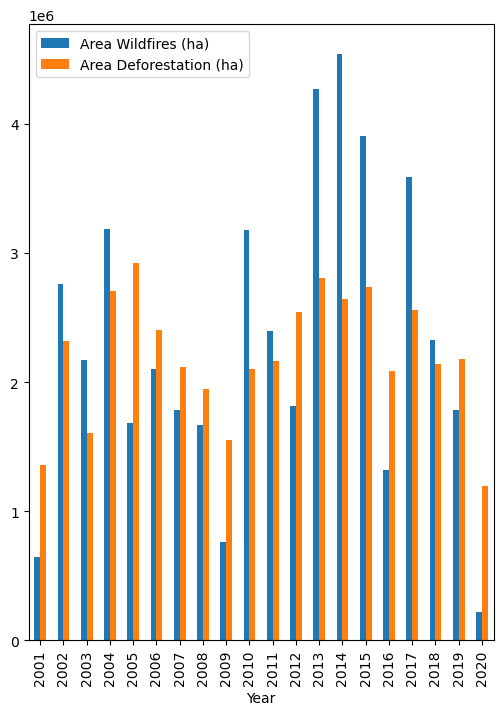

In [30]:
new_merged_df.plot(kind='bar', figsize=(6,8))

plt.show()

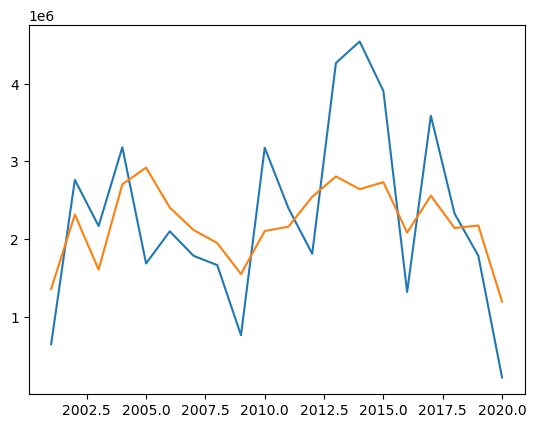

In [35]:
chart2 = plt.plot (new_merged_df)
plt.show()

**Computer Linear Regression**

The r-value is:0.7395928


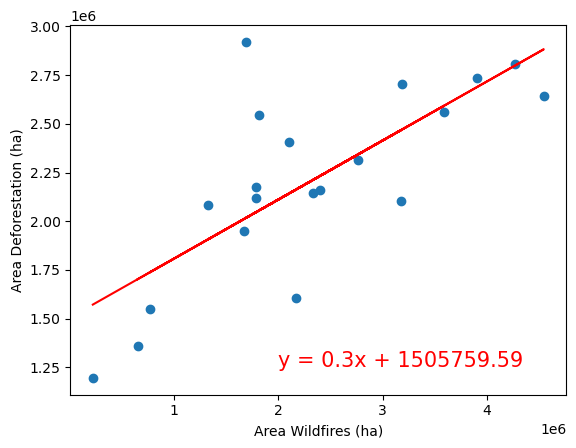

In [50]:
x = new_merged_df ["Area Wildfires (ha)"]
y = new_merged_df ["Area Deforestation (ha)"]

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(2e+06,1.25e+06),fontsize=15,color="red")

plt.ylabel("Area Deforestation (ha)")
plt.xlabel("Area Wildfires (ha)")
print(f"The r-value is:{round(correlation[0],8)}")
plt.show()